Question 3: Decision Trees with Cross-Validation<br>
Task: Implement cross-validation for decision trees to find the best performing model on a
classification problem.

Cross-validation scores: [0.90909091 1.         1.         0.72727273 0.81818182 1.
 1.         0.8        1.         0.9       ]
Mean cross-validation score: 0.9155
Standard deviation of cross-validation score: 0.0971
Best hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
Best cross-validation score from Grid Search: 0.9245
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



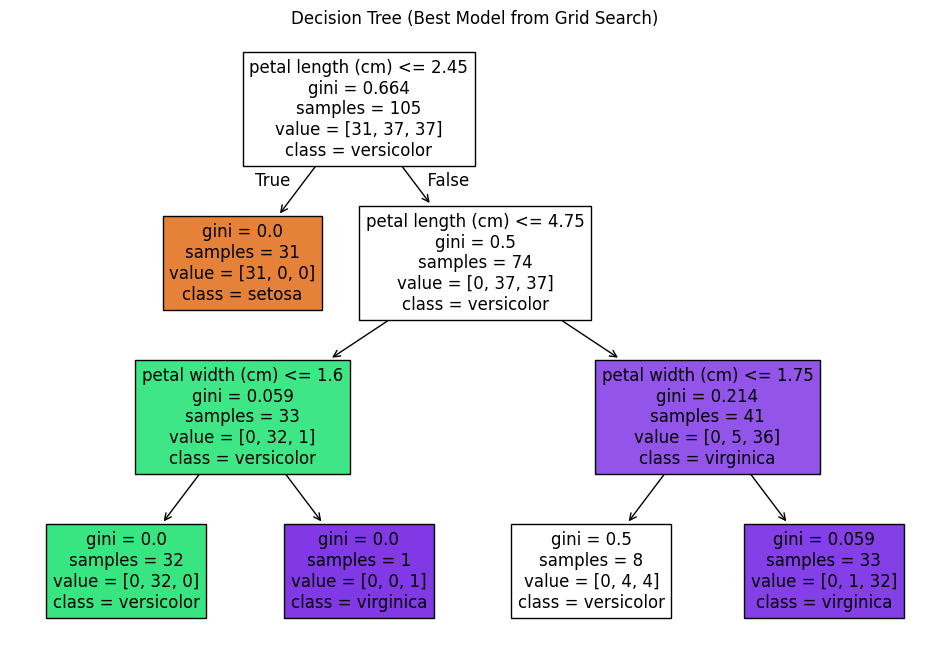

In [1]:
# Write your code here
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Load the Iris dataset (a classic classification problem)
data = load_iris()
X = data.data
y = data.target

# Step 1: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Initialize the Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Step 3: Perform 10-fold cross-validation
cv_scores = cross_val_score(dt_model, X_train, y_train, cv=10, scoring='accuracy')

# Print cross-validation results
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean():.4f}")
print(f"Standard deviation of cross-validation score: {cv_scores.std():.4f}")

# Step 4: Grid Search for hyperparameter tuning (e.g., max_depth, min_samples_split)
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and performance
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best cross-validation score from Grid Search: {grid_search.best_score_:.4f}")

# Step 5: Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Classification report
print("Classification Report on Test Data:")
print(classification_report(y_test, y_pred))

# Step 6: Visualize the Decision Tree (optional)
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(best_model, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.title("Decision Tree (Best Model from Grid Search)")
plt.show()
